# Objective
**Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if we can get them to produce roughly the same model.**

## Load Data 

- using the iris dataset with only two features [Petal length, petal width], to get a nice visualization 
- The setosa flowers is linearly separable from the others 

# Objective
**Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if we can get them to produce roughly the same model.**

## Load Data 

- using iris dataset with only two featrues [Petal length, petal wedith], to get a nice visualization 
- The setosa flowers is linearly seperable from the others 

In [ ]:
from sklearn.datasets import load_iris 

iris = load_iris(as_frame = True)

iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 0:setosa, 1:versicolor, 2:virginica
print(iris.target[::50])
print(iris.target_names)

0      0
50     1
100    2
Name: target, dtype: int32
['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values  # return 2D array of two features  
y = iris.target 


# remove viriginica samples 
setosa_or_versicolor = (y == 0) | (y == 1) 

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


## Visualize Dataset 

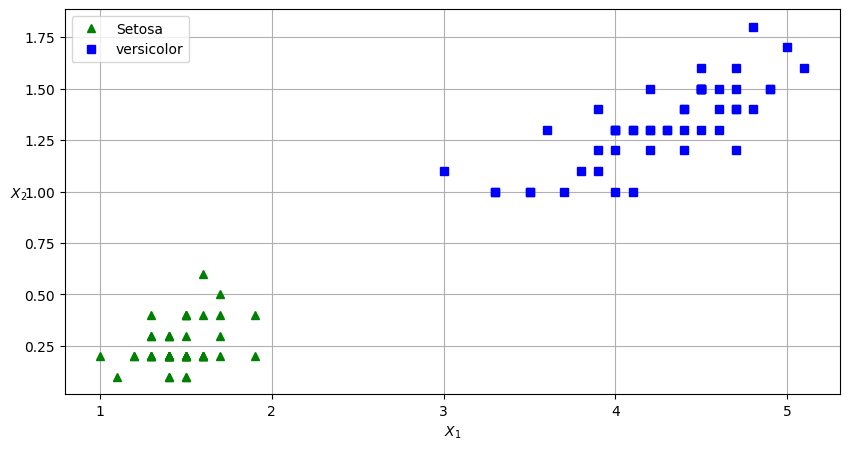

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(X[:, 0][y ==0], X[:, 1][y == 0], "g^", label="Setosa") 
plt.plot(X[:, 0][y ==1], X[:, 1][y == 1], "bs", label="versicolor") 
plt.xlabel("$X_1$")
plt.ylabel("$X_2$", rotation=0)
plt.grid(True)
plt.legend()
plt.show()

**The data is perfectly linearly separable, which meets the requirements for our goal**

## Feature Scaling

In [ ]:
# scaling is required when training an SVMs  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Models Training 


In [ ]:
from sklearn.svm import LinearSVC, SVC 
from sklearn.linear_model import SGDClassifier 

C = 5 # soft margin hyperparameter (trade of between fitting the widest street and margin viloations)
alpha = .05 # regulization hyperparameter for SGD classifier 

linear_svc = LinearSVC(loss='hinge', C=C, random_state=42).fit(X_scaled, y) 

svc = SVC(kernel='linear', C=C).fit(X_scaled, y)

sgd_clf = SGDClassifier(loss='hinge', alpha=alpha, random_state=42).fit(X_scaled, y) 


In [ ]:
# w1x1 + w2x2 +b = 0 : at decision boundry 
# x1 = -(w2/w1 * x2) - b/w1
# slope = -w2/w1 , intercept = -b/w1

def decison_boudry(model):
    coef = model.coef_[0]
    interc = model.intercept_
    w = - coef[1]/ coef[0]  # slope
    b = - interc[0]/ coef[0]  # intercept 
    
    return scaler.inverse_transform([[-10, -10*w +b],[10, 10*w +b]]) # two points define the line in 2D space  


linear_svc_deci = decison_boudry(linear_svc) 
svc_deci = decison_boudry(svc)
sgd_clf_deci = decison_boudry(sgd_clf)   


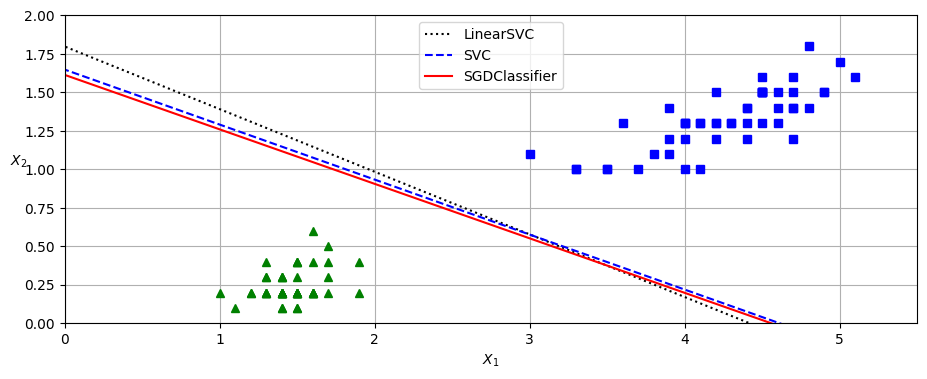

In [ ]:
plt.figure(figsize=(11, 4))

plt.plot(linear_svc_deci[:,0], linear_svc_deci[:,1], "k:", label="LinearSVC" )
plt.plot(svc_deci[:,0], svc_deci[:,1],"b--", label="SVC")
plt.plot(sgd_clf_deci[:, 0], sgd_clf_deci[:, 1], "r-", label="SGDClassifier")

plt.plot(X[:, 0][y ==0], X[:, 1][y == 0], "g^" ) 
plt.plot(X[:, 0][y ==1], X[:, 1][y == 1], "bs") 
plt.xlabel("$X_1$")
plt.ylabel("$X_2$", rotation=0)
plt.grid(True)
plt.legend(loc='upper center')
plt.axis([0,5.5,0,2])
plt.show()

## Conclusion:
By selecting the appropriate kernel and regularization parameter, we can achieve a model with comparable performance.

In [9]:
from sklearn.datasets import load_iris 

iris = load_iris(as_frame = True)

iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# 0:setosa, 1:versicolor, 2:virginica
print(iris.target[::50])
print(iris.target_names)

0      0
50     1
100    2
Name: target, dtype: int32
['setosa' 'versicolor' 'virginica']


In [12]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values  # return 2D array of two features  
y = iris.target 


# remove viriginica samples 
setosa_or_versicolor = (y == 0) | (y == 1) 

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


## Visualize Dataset 

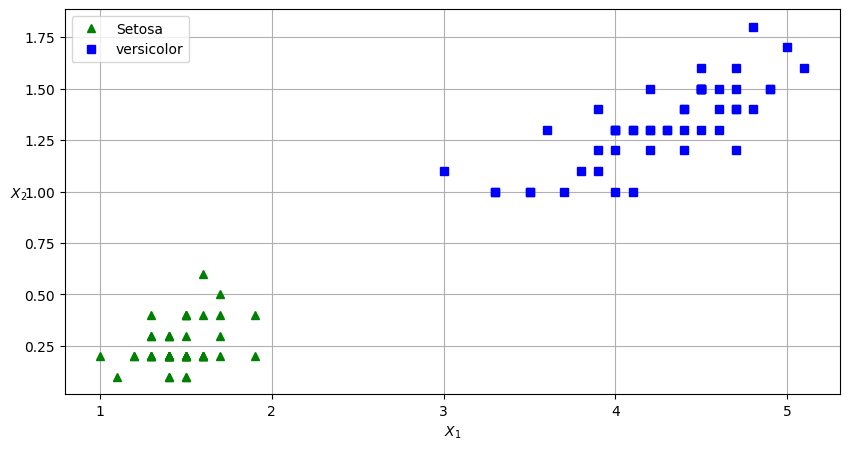

In [20]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(X[:, 0][y ==0], X[:, 1][y == 0], "g^", label="Setosa") 
plt.plot(X[:, 0][y ==1], X[:, 1][y == 1], "bs", label="versicolor") 
plt.xlabel("$X_1$")
plt.ylabel("$X_2$", rotation=0)
plt.grid(True)
plt.legend()
plt.show()

**The data is perfectly linearly separable, which meets the requirements for our goal**

## Feature Scaling

In [21]:
# scaling is required when training an SVMs  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Models Training 


In [61]:
from sklearn.svm import LinearSVC, SVC 
from sklearn.linear_model import SGDClassifier 

C = 5 # soft margin hyperparameter (trade of between fitting the widest street and margin viloations)
alpha = .05 # regulization hyperparameter for SGD classifier 

linear_svc = LinearSVC(loss='hinge', C=C, random_state=42).fit(X_scaled, y) 

svc = SVC(kernel='linear', C=C).fit(X_scaled, y)

sgd_clf = SGDClassifier(loss='hinge', alpha=alpha, random_state=42).fit(X_scaled, y) 


In [62]:
# w1x1 + w2x2 +b = 0 : at decision boundry 
# x1 = -(w2/w1 * x2) - b/w1
# slope = -w2/w1 , intercept = -b/w1

def decison_boudry(model):
    coef = model.coef_[0]
    interc = model.intercept_
    w = - coef[1]/ coef[0]  # slope
    b = - interc[0]/ coef[0]  # intercept 
    
    return scaler.inverse_transform([[-10, -10*w +b],[10, 10*w +b]]) # two points define the line in 2D space  


linear_svc_deci = decison_boudry(linear_svc) 
svc_deci = decison_boudry(svc)
sgd_clf_deci = decison_boudry(sgd_clf)   


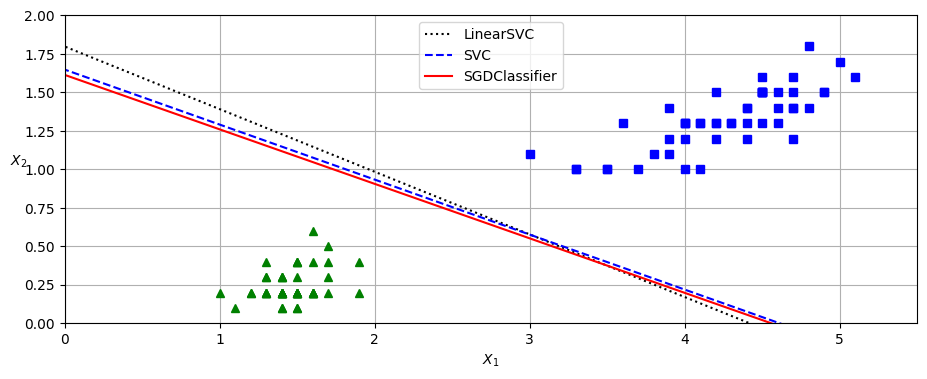

In [66]:
plt.figure(figsize=(11, 4))

plt.plot(linear_svc_deci[:,0], linear_svc_deci[:,1], "k:", label="LinearSVC" )
plt.plot(svc_deci[:,0], svc_deci[:,1],"b--", label="SVC")
plt.plot(sgd_clf_deci[:, 0], sgd_clf_deci[:, 1], "r-", label="SGDClassifier")

plt.plot(X[:, 0][y ==0], X[:, 1][y == 0], "g^" ) 
plt.plot(X[:, 0][y ==1], X[:, 1][y == 1], "bs") 
plt.xlabel("$X_1$")
plt.ylabel("$X_2$", rotation=0)
plt.grid(True)
plt.legend(loc='upper center')
plt.axis([0,5.5,0,2])
plt.show()

## Conclusion:
By selecting the appropriate kernel and regularization parameter, we can achieve a model with comparable performance. 